In [13]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2025-03-11 15:23:37,686 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:81:8D:26:04:64
2025-03-11 15:23:40,790 | INFO     |: Connected to C0:81:8D:26:04:64


## IMU Accelerometer data retrieval

In [11]:
#Prompt recording data from loop
acc_roll = []
acc_pitch = []
filt_roll = []
filt_pitch = []
gy_roll = []
gy_pitch = []
gy_yaw = []
comp_pitch = []
comp_roll = []
timestamps = []

def imu_data_handler(uuid, bytearr):
    try:
        imudata = ble.bytearray_to_string(bytearr)
        arr = imudata.split("pitch:")[1] #Split messages
        apitch, arr = arr.split("roll:")
        aroll, arr = arr.split("filtp:")
        filtp, arr = arr.split("filtr:")
        filtr, arr = arr.split("gp:")
        gyp, arr = arr.split("gr:")
        gyr, arr = arr.split("gy:")
        gyy, arr = arr.split("cp:")
        cp, arr = arr.split("cr:")
        cr, time = arr.split("T:")
        acc_pitch.append(float(apitch))
        acc_roll.append(float(aroll))
        filt_pitch.append(float(filtp))
        filt_roll.append(float(filtr))
        gy_pitch.append(float(gyp))
        gy_roll.append(float(gyr))
        gy_yaw.append(float(gyy))
        comp_pitch.append(float(cp))
        comp_roll.append(float(cr))
        timestamps.append(int(time))
    except Exception as e:
        print(e)


ble.start_notify(ble.uuid['RX_STRING'], imu_data_handler)


In [12]:
ble.send_command(CMD.START_COLLECTION, "")
time.sleep(20)
ble.send_command(CMD.GET_IMU_DATA, "")

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out o

Exception: Not connected to a BLE device

In [5]:
ble.stop_notify(ble.uuid['RX_STRING'],)

128


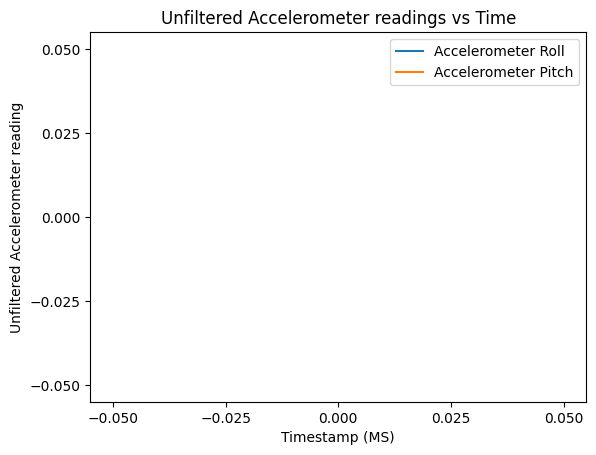

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np
print(len(acc_pitch))
plt.plot(timestamps, acc_roll)
plt.plot(timestamps, acc_pitch)
plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Accelerometer Roll", "Accelerometer Pitch"], loc="upper right")
plt.title('Unfiltered Accelerometer readings vs Time')
plt.ylabel('Unfiltered Accelerometer reading')
plt.xlabel('Timestamp (MS)')
plt.show()

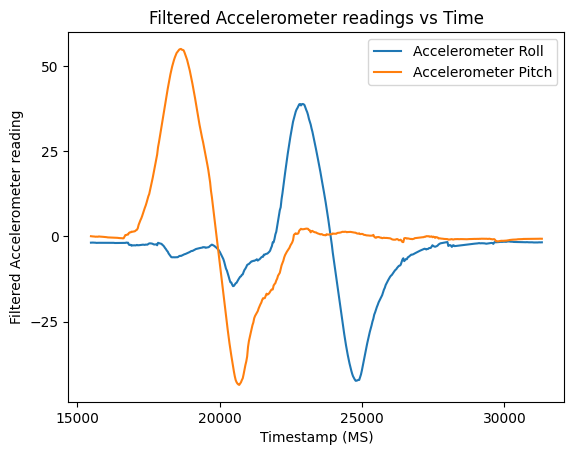

In [327]:
plt.plot(timestamps, filt_roll)
plt.plot(timestamps, filt_pitch)
plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Accelerometer Roll", "Accelerometer Pitch"], loc="upper right")
plt.title('Filtered Accelerometer readings vs Time')
plt.ylabel('Filtered Accelerometer reading')
plt.xlabel('Timestamp (MS)')
plt.show()

In [328]:
from scipy.fft import fft, fftfreq, fftshift

froll = fft(acc_roll)
fpitch = fft(acc_pitch)

N = len(timestamps)
dur = timestamps[N-1]-timestamps[0]
T = 1/(N/dur*1000)  #Period
print("Duration: ", dur)


fftroll = 2/N * np.abs (froll [0:N//2])
fftpitch = 2/N * np.abs (fpitch [0:N//2])

freq_roll= fftfreq(N, T)[:N//2]
freq_pitch= fftfreq(N, T)[:N//2]


Duration:  15842


512


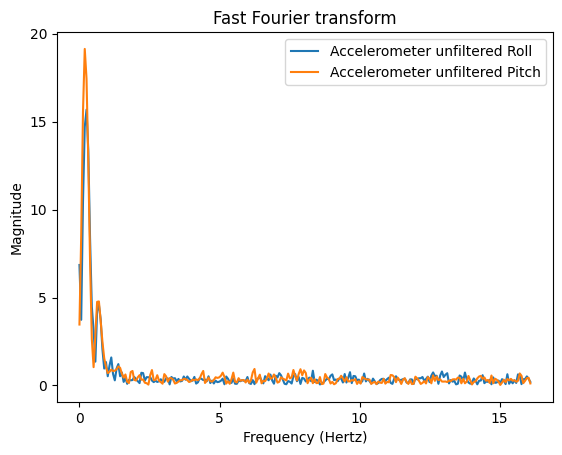

In [329]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np
print(len(acc_pitch))
plt.plot(freq_roll, fftroll)
plt.plot(freq_pitch, fftpitch)
plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Accelerometer unfiltered Roll", "Accelerometer unfiltered Pitch"], loc="upper right")
plt.title('Fast Fourier transform')
plt.ylabel('Magnitude')
plt.xlabel('Frequency (Hertz)')
plt.show()

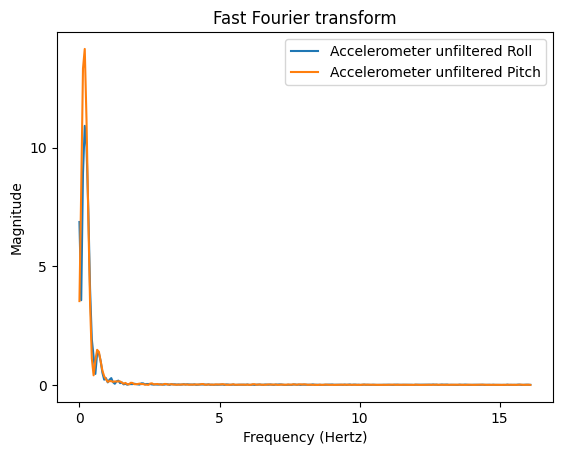

In [330]:
from scipy.fft import fft, fftfreq, fftshift

froll = fft(filt_roll)
fpitch = fft(filt_pitch)

N = len(timestamps)
dur = timestamps[N-1]-timestamps[0]
T = 1/(N/dur*1000)  #Period


fftroll = 2/N * np.abs (froll [0:N//2])
fftpitch = 2/N * np.abs (fpitch [0:N//2])

freq_roll= fftfreq(N, T)[:N//2]
freq_pitch= fftfreq(N, T)[:N//2]

plt.plot(freq_roll, fftroll)
plt.plot(freq_pitch, fftpitch)
plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Accelerometer unfiltered Roll", "Accelerometer unfiltered Pitch"], loc="upper right")
plt.title('Fast Fourier transform')
plt.ylabel('Magnitude')
plt.xlabel('Frequency (Hertz)')
plt.show()


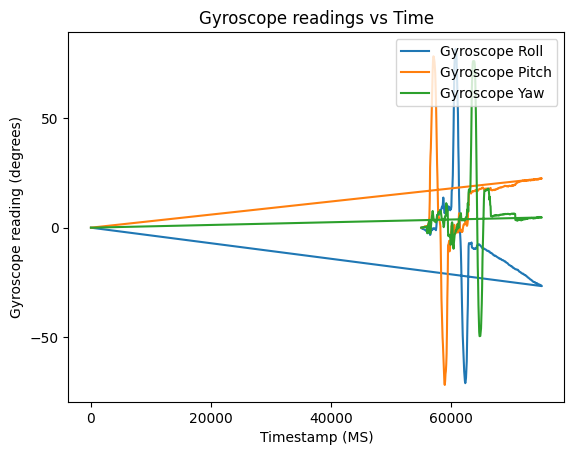

2025-02-11 00:59:04,481 | INFO     |: Disconnected from 1EFFEDB9-73BA-9396-D724-47E443C12C76


In [342]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np
plt.plot(timestamps, gy_roll)
plt.plot(timestamps, gy_pitch)
plt.plot(timestamps, gy_yaw)
plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Gyroscope Roll", "Gyroscope Pitch", "Gyroscope Yaw"], loc="upper right")
plt.title('Gyroscope readings vs Time')
plt.ylabel('Gyroscope reading (degrees)')
plt.xlabel('Timestamp (MS)')
plt.show()


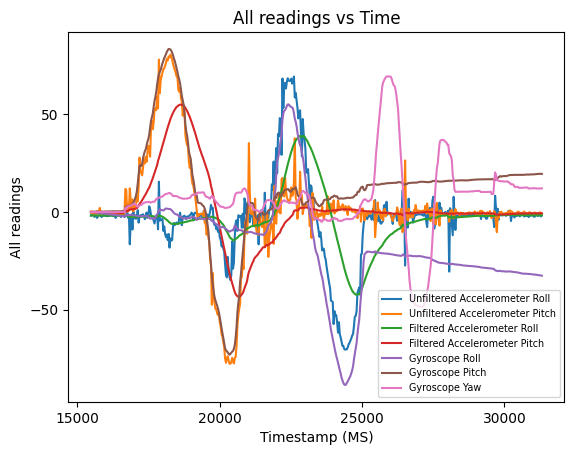

2025-02-10 23:38:02,379 | INFO     |: Disconnected from 1EFFEDB9-73BA-9396-D724-47E443C12C76


In [333]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np
plt.plot(timestamps, acc_roll)
plt.plot(timestamps, acc_pitch)
plt.plot(timestamps, filt_roll)
plt.plot(timestamps, filt_pitch)
plt.plot(timestamps, gy_roll)
plt.plot(timestamps, gy_pitch)
plt.plot(timestamps, gy_yaw)
plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Unfiltered Accelerometer Roll", "Unfiltered Accelerometer Pitch", "Filtered Accelerometer Roll", "Filtered Accelerometer Pitch", "Gyroscope Roll", "Gyroscope Pitch", "Gyroscope Yaw"], loc="lower right", fontsize='x-small')
plt.title('All readings vs Time')
plt.ylabel('All readings')
plt.xlabel('Timestamp (MS)')
plt.show()

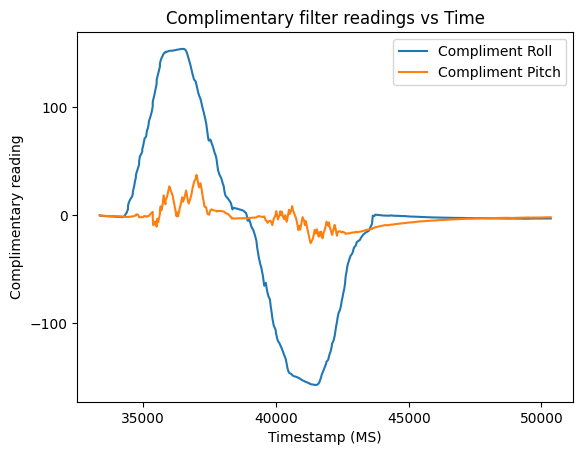

In [71]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np
plt.plot(timestamps, comp_roll)
plt.plot(timestamps, comp_pitch)
plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Compliment Roll", "Compliment Pitch"], loc="upper right")
plt.title('Complimentary filter readings vs Time')
plt.ylabel('Complimentary reading')
plt.xlabel('Timestamp (MS)')
plt.show()

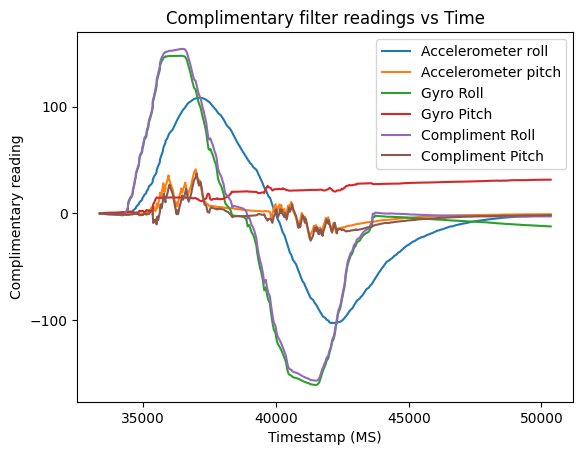

2025-02-10 14:44:03,486 | INFO     |: Disconnected from 1EFFEDB9-73BA-9396-D724-47E443C12C76


In [72]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np
plt.plot(timestamps, filt_roll)
plt.plot(timestamps, filt_pitch)
plt.plot(timestamps, gy_roll)
plt.plot(timestamps, gy_pitch)
plt.plot(timestamps, comp_roll)
plt.plot(timestamps, comp_pitch)
plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Accelerometer roll", "Accelerometer pitch", "Gyro Roll", "Gyro Pitch", "Compliment Roll", "Compliment Pitch"], loc="upper right")
plt.title('Complimentary filter readings vs Time')
plt.ylabel('Complimentary reading')
plt.xlabel('Timestamp (MS)')
plt.show()

In [146]:
ble.disconnect()

2025-02-04 15:31:09,854 | INFO     |: Disconnected from 1EFFEDB9-73BA-9396-D724-47E443C12C76
